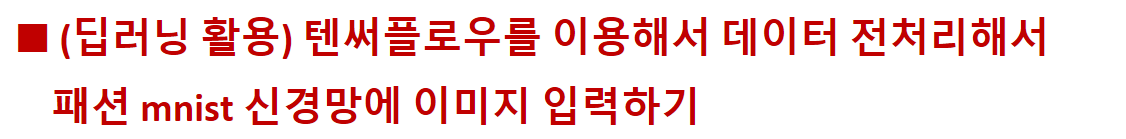

In [3]:
####################### 1. 패션 mnist 데이터를 학습 시켜 모델을 준비합니다. ################

# 1. mnist 데이터를 불러옵니다.
import  tensorflow  as  tf
from tensorflow.keras.datasets.fashion_mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data() 

# 2.1  28x28 의 shape 를 1 x 784 로 변경합니다.

x_train = x_train.reshape(60000,28*28)
x_test  = x_test.reshape(10000, 28*28)

x_train = x_train/255.0
x_test = x_test/255.0

# 2.2 정답 데이터를 준비합니다. (p98 원핫인코딩을 해야합니다.)
 
from  tensorflow.keras.utils import  to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print ( y_train.shape)  # (60000, 10)


4431872/4422102 [==============================] - 0s 0us/step
(60000, 10)


In [ ]:
# 3. 모델을 구성합니다.

#그림: https://cafe.daum.net/oracleoracle/Shyl/183

from  tensorflow.keras.models  import  Sequential
from  tensorflow.keras.layers    import  Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784, ) ) ) # 은닉1층
model.add(Dense(128, activation='relu' ) ) # 은닉1층
model.add(Dense( 10, activation='softmax') ) 

# 4. 모델을 설정합니다. (경사하강법과 오차함수를 정의해줍니다. 4장에서 배웁니다)

model.compile(optimizer='adam',  # 경사하강법 
                     loss='categorical_crossentropy',  #오차함수
                     metrics=['acc'] )  # 학습과정에서 정확도를 보려고 지정

# 5. 모델을 훈련 시킵니다.

model.fit( x_train, y_train, epochs=30, batch_size=100)

#model.fit( 훈련데이터, 정답, 에폭수, 배치사이즈) 
# 에폭수 :  학습횟수 (책을 몇번 볼건지)
# 배치사이즈:  한번에 학습할 양 ( 사람은 책을 한번에 한페이지 밖에 못보지만 컴퓨터는 한번에
#                  여러 페이지를 볼 수 있다)


# 6. 모델을 평가합니다. (시험을 봅니다.)

model.eval‎uate(x_test, y_test) 

model.save('/content/drive/MyDrive/pgw_fashion/fashion_model.h5')


In [4]:
####################### 2. 만들어진 모델이 잘 불러와지는지 확인합니다.  ####################

# 모델 불러오는 코드

# 1. 모델을 불러옵니다.

from tensorflow.keras.models import load_model

new_model = load_model('/content/drive/MyDrive/pgw_fashion/fashion_model.h5')

# 2.모델을 평가합니다. (오차, 정확도가 출력됩니다.)

new_model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 1ms/step - loss: 0.3983 - acc: 0.8960


[0.3982793092727661, 0.8960000276565552]

In [ ]:
############ 3. 테스트할 이미지를 올리기 위해 코렙과 구글 드라이브를 연동합니다. ###########

from google.colab import drive
drive.mount('/content/drive')


In [5]:
######## 4. /content/drive/MyDrive/ 밑에 pgw_fashion 폴더를 만듭니다. ##############

####### 5. /content/drive/MyDrive/pgw_fashion 밑에 아래의 dress.jpg 이미지를 올립니다. #########

######### 6. 텐써 플로우를 이용하여 dress.jpg 를 흑백처리하고 28x28 로 resize 합니다. ###########

%cd /content/drive/MyDrive/pgw_fashion

import tensorflow as  tf
import cv2

img_path = '/content/drive/MyDrive/pgw_fashion/dress.jpg'

img = cv2.imread(img_path)        # 이지미를 숫자로 변환합니다.
img = cv2.bitwise_not(img)          # 색을 반전 시킵니다. (하얀색 배경을 검정색으로 변경)
print(img.shape)           # (683,427,3)

import tensorflow.compat.v1 as tf       # 텐써플로우 2.0 버전에서 1.0 버전의 명령어를 사용하고 싶을때 쓰는 코드
tf.disable_v2_behavior() 

resized_images=tf.image.resize_images(img, (28, 28))    # 텐써플로우 1.0의 함수이고 이미지를 resize 하는 함수
a = tf.image.rgb_to_grayscale(resized_images)     # 컬러 이미지를 흑백으로 변경하는 코드
print(a.shape)       # (28,28,1)



/content/drive/MyDrive/pgw_fashion
(683, 427, 3)
Instructions for updating:
non-resource variables are not supported in the long term
(28, 28, 1)


In [6]:
############# 7. 전처리한 데이터를 신경망에 넣고 예측합니다. ##################

import numpy as np

x =tf.reshape(a, [ 28,28])          # (28,28,1) ---> (28,28)
x2 =tf.reshape(x, [1, 784])          # (28,28) ---> (1, 784)
# print(x2.shape)     # (1,784)

from tensorflow.keras.models import load_model

new_model = load_model('fashion_model.h5')

results = new_model.predict(x2,steps=1)          # stpes = 1 : 예측한번할거다. / 사진이 여러개면 숫자 up
np.argmax(results)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


3

In [7]:
############# 8. 어떤 패션인지 확인합니다. ###############

target_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

print ( target_dict[np.argmax(results)] )          # Dress



Dress


In [8]:
# 문제. 다음의 티셔츠 사진을 신경망에 넣고 잘 맞추는지 확인합니다.

img_path = '/content/drive/MyDrive/pgw_fashion/T-shirt.jpg'


img = cv2.imread(img_path)        # 이지미를 숫자로 변환합니다.
img = cv2.bitwise_not(img)          # 색을 반전 시킵니다. (하얀색 배경을 검정색으로 변경)
print(img.shape)           # (683,427,3)

import tensorflow.compat.v1 as tf       # 텐써플로우 2.0 버전에서 1.0 버전의 명령어를 사용하고 싶을때 쓰는 코드
tf.disable_v2_behavior() 

resized_images=tf.image.resize_images(img, (28, 28))    # 텐써플로우 1.0의 함수이고 이미지를 resize 하는 함수
a = tf.image.rgb_to_grayscale(resized_images)     # 컬러 이미지를 흑백으로 변경하는 코드
print(a.shape)       # (28,28,1)

############# 7. 전처리한 데이터를 신경망에 넣고 예측합니다. ##################

import numpy as np

x =tf.reshape(a, [ 28,28])          # (28,28,1) ---> (28,28)
x2 =tf.reshape(x, [1, 784])          # (28,28) ---> (1, 784)
# print(x2.shape)     # (1,784)

from tensorflow.keras.models import load_model

new_model = load_model('fashion_model.h5')

results = new_model.predict(x2,steps=1)          # stpes = 1 : 예측한번할거다. / 사진이 여러개면 숫자 up
np.argmax(results)

print ( target_dict[np.argmax(results)] )          # Shirt


(743, 712, 3)
(28, 28, 1)
Shirt


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
